In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def display_images(images, names):
    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = []

    for index, image in enumerate(images):
        ax.append(fig.add_subplot(1, len(images), index + 1))
        ax[-1].set_title(names[index])
        plt.imshow(image)
    plt.show()

In [3]:
def plot_histogram(images, names):
    fig = plt.figure(figsize=(20, 5), dpi=100)
    ax = []

    for index, image in enumerate(images):
        for i, col in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            ax.append(fig.add_subplot(1, len(images), index + 1))
            ax[-1].set_title(names[index])
            plt.plot(hist, color = col)
            plt.xlim([0, 256])

    plt.show()

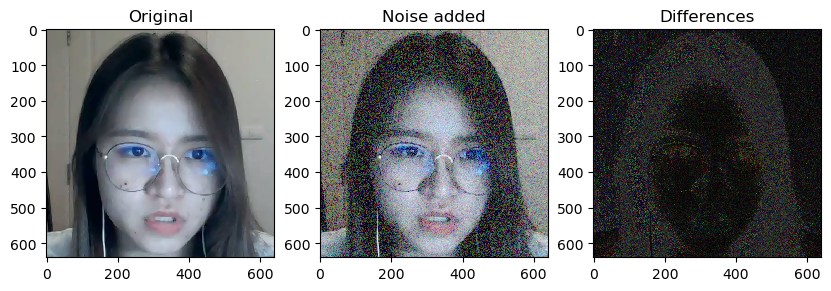

In [4]:
img_name = "input2"
img = cv2.imread(img_name + ".png")[...,::-1]
noisy_img = cv2.imread(img_name + "noise.png")[...,::-1]
diff = cv2.absdiff(img, noisy_img)
display_images([img, noisy_img, diff], ["Original", "Noise added", "Differences"])

/tmp/ipykernel_3776/165972780.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.append(fig.add_subplot(1, len(images), index + 1))


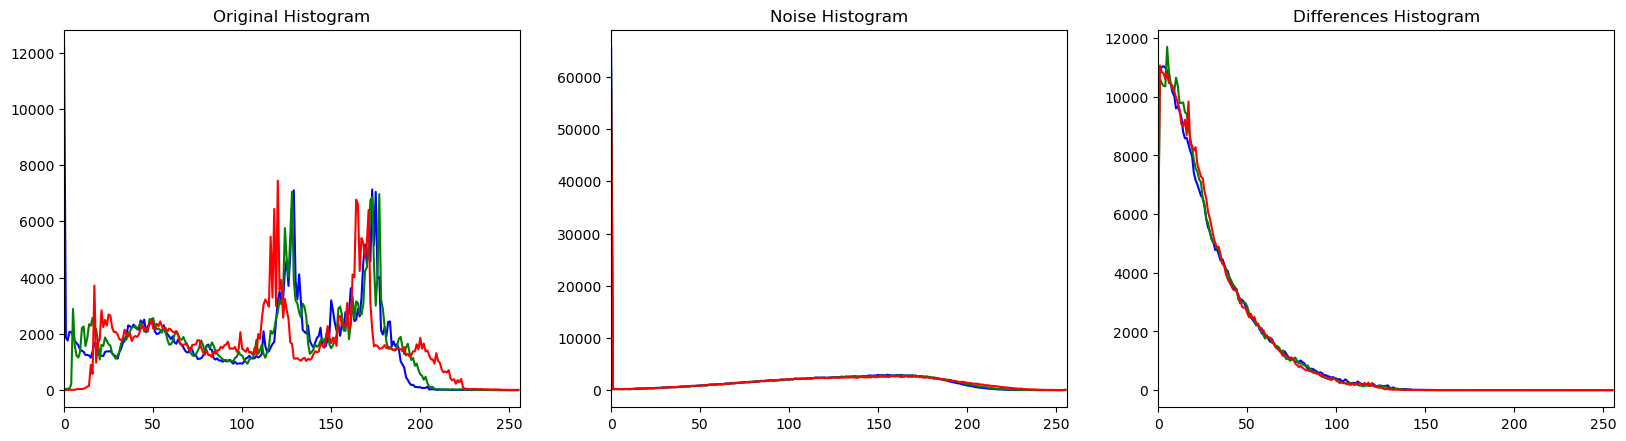

In [5]:
plot_histogram([img, noisy_img, diff], ["Original Histogram", "Noise Histogram", "Differences Histogram"])

In [22]:
def plot_expectation(images, names):
    fig = plt.figure(figsize=(20, 5), dpi=100)
    ax = []

    for index, img in enumerate(images):
        for ind, col in enumerate(['b', 'g', 'r']):
            avg = []
            for i in range(0, 637):
                for j in range(0, 637):
                    avg.append(np.sum(np.sum(img[i: i + 4, j: j + 4], axis=0), axis=0)[ind] / 4)
            avg = np.array(avg)
            ax.append(fig.add_subplot(1, len(images), index + 1))
            ax[-1].set_title(names[index])
            plt.plot(avg, color = col)
            plt.xlim([0, 637])

    plt.show()


/tmp/ipykernel_3776/3146139412.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.append(fig.add_subplot(1, len(images), index + 1))


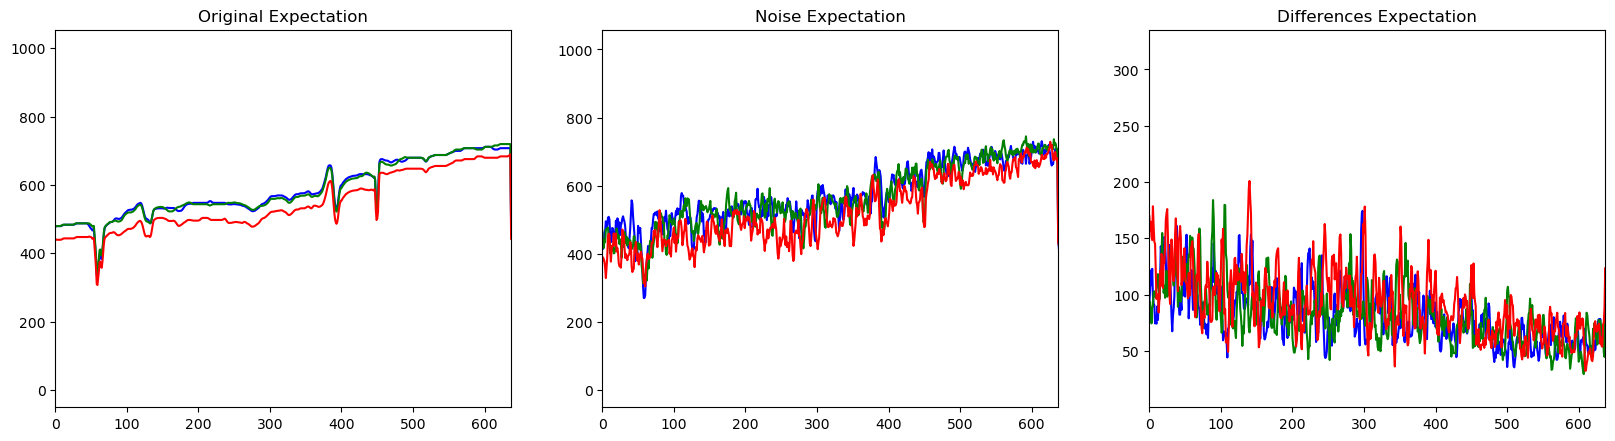

In [23]:
plot_expectation([img, noisy_img, diff], ["Original Expectation", "Noise Expectation", "Differences Expectation"])

In [24]:
def plot_variance(images, names):
    fig = plt.figure(figsize=(20, 5), dpi=100)
    ax = []

    for index, img in enumerate(images):
        for ind, col in enumerate(['b', 'g', 'r']):
            var = []
            for i in range(0, 637):
                for j in range(0, 637):
                    mean = np.sum(np.sum(img[i: i + 4, j: j + 4], axis=0), axis=0)[ind] / 4
                    var = ((np.sum(img[i: i + 4, j: j + 4] - mean) ** 2) / 3)
            ax.append(fig.add_subplot(1, len(images), index + 1))
            ax[-1].set_title(names[index])
            plt.plot(var, color = col)
            plt.xlim([0, 637])

    plt.show()


In [ ]:
plot_variance([img, noisy_img, diff], ["Original Variances", "Noise Variances", "Differences Variances"])